# Missing value treatment

* Missing values can be treated by either deletion, imputation with central tendencies, or advanced techniques, but central tendency imputation may distort variability and relationship in the data.
* The limitation of inputting missing values with central tendencies include distortion of variability, impacts on relationships, and underestimation of uncertainty.
* Missing value treatment for the distance column involves identifying the nature of missingness, exploring imputation techniques, evaluating the impact, and conducting sensitivity analysis.
    - Replacing with mean : Mean gets impacted by the presence of outliers. So, when the column has outliers, using this method to impute may lead to erroneous imputation.
    - Replacing with median : When the column has outliers, median is a more suitable way to impute the missing values.
    - Replacing with mode - Suitable for categorical data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 300)

data = pd.read_csv('data/Melbourne_Housing.csv')

data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['BuildingArea'] = data['BuildingArea'].replace(['missing','inf'], np.nan)
data['BuildingArea'] = data['BuildingArea'].astype(float)
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)

data.info()
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27103 entries, 0 to 27102
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27103 non-null  object        
 1   Rooms          27103 non-null  int64         
 2   Type           27103 non-null  object        
 3   SellerG        27103 non-null  object        
 4   Date           27103 non-null  datetime64[ns]
 5   Distance       27102 non-null  float64       
 6   Postcode       27102 non-null  float64       
 7   Bedroom        20678 non-null  float64       
 8   Bathroom       20672 non-null  float64       
 9   Car            20297 non-null  float64       
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10529 non-null  float64       
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27103 non-null  object        
 14  Propertycount  27103 non-null  int64         
 15  Price          2710

,count,mean,min,25%,50%,75%,max,std
Rooms,27103.000,2.992,1.000,2.000,3.000,4.000,16.000,0.955
Date,27103,2017-05-23 12:25:09.441759488,2016-01-28 00:00:00,2016-11-19 00:00:00,2017-07-08 00:00:00,2017-10-28 00:00:00,2018-03-17 00:00:00,NaN
Distance,27102.000,11.280,0.000,6.400,10.500,14.000,48.100,6.784
Postcode,27102.000,3113.787,3000.000,3046.000,3088.000,3153.000,3978.000,111.129
Bedroom,20678.000,3.046,0.000,2.000,3.000,4.000,20.000,0.955
Bathroom,20672.000,1.592,0.000,1.000,1.000,2.000,9.000,0.701
Car,20297.000,1.716,0.000,1.000,2.000,2.000,18.000,0.994
Landsize,17873.000,560.537,50.000,220.000,513.000,664.000,76000.000,1411.309
BuildingArea,10529.000,154.512,11.000,101.000,133.000,183.000,6791.000,130.584
YearBuilt,11985.000,1966.618,1850.000,1950.000,1970.000,2000.000,2019.000,36.042


In [11]:
# select the instances where missing value is greater than 0
pd.DataFrame({'Count': data.isnull().sum()[data.isnull().sum()>0], 'Percentage':(data.isnull().sum()[data.isnull().sum()>0] / data.shape[0])*100})

,Count,Percentage
Distance,1,0.004
Postcode,1,0.004
Bedroom,6425,23.706
Bathroom,6431,23.728
Car,6806,25.112
Landsize,9230,34.055
BuildingArea,16574,61.152
YearBuilt,15118,55.780


In [14]:
# extracting all the information of other variables where Disatnce is null
data.loc[data['Distance'].isnull()]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
9590,Fawkner Lot,3,h,Brad,2018-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,962,616000


In [15]:
data.loc[data['Suburb'] == 'Fawkner Lot']

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
9590,Fawkner Lot,3,h,Brad,2018-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,962,616000


In [16]:
data = data.drop(9590).reset_index(drop=True)

In [17]:
# select the instances where missing value is greater than 0
pd.DataFrame({'Count': data.isnull().sum()[data.isnull().sum()>0], 'Percentage':(data.isnull().sum()[data.isnull().sum()>0] / data.shape[0])*100})

,Count,Percentage
Bedroom,6424,23.703
Bathroom,6430,23.725
Car,6805,25.109
Landsize,9229,34.053
BuildingArea,16573,61.150
YearBuilt,15117,55.778


In [19]:
# extracting all the information of other vriable where Bedroom is null
data.loc[data['Bedroom'].isnull()]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
8,Altona North,4,h,hockingstuart,2016-09-03,11.100,3025.000,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,5132,857500
12,Ashburton,2,h,Marshall,2016-09-03,11.000,3147.000,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,3052,1820000
14,Avondale Heights,4,h,Jellis,2016-09-03,10.500,3034.000,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,4502,1310000
25,Balwyn North,4,u,hockingstuart,2016-09-03,9.200,3104.000,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,7809,1450000
26,Balwyn North,2,h,Fletchers,2016-09-03,9.200,3104.000,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,7809,1305000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27088,Footscray,2,u,McGrath,2017-09-30,5.100,3011.000,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,7570,455500
27089,Forest Hill,2,h,Fletchers,2017-09-30,15.400,3131.000,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Metropolitan,4385,762000
27090,Glen Waverley,3,u,Ray,2017-09-30,16.700,3150.000,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Metropolitan,15321,1100000
27093,Kingsbury,2,t,RW,2017-09-30,12.100,3083.000,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,1414,512000


In [20]:
data.loc[data['Bedroom'].isnull(), 'Bathroom'].value_counts(dropna=False)

Bathroom
NaN    6424
Name: count, dtype: int64

In [21]:
data.loc[data['Bedroom'].isnull(), 'Car'].value_counts(dropna=False)

Car
NaN    6424
Name: count, dtype: int64

In [22]:
data.loc[data['Bedroom'].isnull(), 'Landsize'].value_counts(dropna=False)

Landsize
NaN        6418
594.000       1
446.000       1
338.000       1
250.000       1
549.000       1
239.000       1
Name: count, dtype: int64

In [23]:
data.loc[data['Bedroom'].isnull(), 'BuildingArea'].value_counts(dropna=False)

BuildingArea
NaN    6424
Name: count, dtype: int64

In [24]:
data.loc[data['Bedroom'].isnull(), 'YearBuilt'].value_counts(dropna=False)

YearBuilt
NaN    6424
Name: count, dtype: int64

In [28]:
data.loc[data['Bedroom'].isnull(), 'Suburb'].value_counts(dropna=False)

Suburb
Reservoir          236
Bentleigh East     144
St Kilda           116
Glenroy            116
Richmond           111
                  ... 
Cranbourne East      1
Melton West          1
New Gisborne         1
Scoresby             1
Plenty               1
Name: count, Length: 307, dtype: int64

In [29]:
data['Suburb'].nunique()

344

In [30]:
data.loc[data['Bedroom'].isnull(), 'Regionname'].value_counts(dropna=False)

Regionname
Southern Metropolitan         2197
Northern Metropolitan         1912
Western Metropolitan          1212
Eastern Metropolitan           728
South-Eastern Metropolitan     317
Eastern Victoria                26
Northern Victoria               25
Western Victoria                 7
Name: count, dtype: int64

In [39]:
data.groupby(['Regionname', 'Type'])[['Bedroom', 'Bathroom', 'Car']].mean()

Bedroom  Bathroom   Car
Regionname                 Type                         
Eastern Metropolitan       h       3.552     1.807 1.946
                           t       3.032     1.853 1.673
                           u       2.357     1.263 1.290
Eastern Victoria           h       3.560     1.881 2.098
                           u       2.667     1.000 1.333
Northern Metropolitan      h       3.106     1.468 1.685
                           t       2.567     1.620 1.362
                           u       1.878     1.160 1.093
Northern Victoria          h       3.496     1.892 2.146
                           u       3.000     2.000 2.000
South-Eastern Metropolitan h       3.476     1.713 2.094
                           t       2.887     1.849 1.679
                           u       2.260     1.205 1.342
Southern Metropolitan      h       3.383     1.840 1.883
                           t       3.024     2.012 1.780
                           u       1.939     1.191 1.135
Western Metropolitan       h       3.244     1.576 1.907
                           t       2.880     1.851 1.538
                           u       2.106     1.192 1.144
Western Victoria           h       3.379     1.448 2.060

### fillna(), transform() 
fillna() function - is used to fill NaN values using the provided input value.
```
syntax of fillna(): data['column'].fillna(value = x)
```
tansform() - works on rach value of a DataFrame and allows to execute a specified function on each value
```
Syntax of transform(): data.transform(func = function name)
* func - A function to be executed on the values of the DataFrame.
```

In [41]:
# imputing missing values in Bedroom column
data['Bedroom'] = data['Bedroom'].fillna(value  = data.groupby(['Regionname', 'Type'])['Bedroom'].transform('mean'))

In [42]:
# imputing missing values in Bathroom column
data['Bathroom'] = data['Bathroom'].fillna(value  = data.groupby(['Regionname', 'Type'])['Bathroom'].transform('mean'))

In [43]:
# imputing missing values in Car column
data['Car'] = data['Car'].fillna(value  = data.groupby(['Regionname', 'Type'])['Car'].transform('mean'))

In [44]:
# select the instances where missing value is greater than 0
pd.DataFrame({'Count': data.isnull().sum()[data.isnull().sum()>0], 'Percentage':(data.isnull().sum()[data.isnull().sum()>0] / data.shape[0])*100})

,Count,Percentage
Landsize,9229,34.053
BuildingArea,16573,61.150
YearBuilt,15117,55.778


In [45]:
data['Bedroom'] = data['Bedroom'].astype(int)
data['Bathroom'] = data['Bathroom'].astype(int)
data['Car'] = data['Car'].astype(int)

In [46]:
# creating new Total space column
data['Total_Space_New'] = data['Rooms'] + data['Bedroom'] + data['Bathroom'] + data['Car']
data['Total_Space_New'] = data['Total_Space_New'].astype(int)

In [47]:
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total_Space_New
0,Airport West,3,t,Nelson,2016-09-03,13.500,3042.000,3,2,1,303.000,225.000,2016.000,Western Metropolitan,3464,840000,9
1,Albert Park,2,h,hockingstuart,2016-09-03,3.300,3206.000,2,1,0,120.000,82.000,1900.000,Southern Metropolitan,3280,1275000,5
2,Albert Park,2,h,Thomson,2016-09-03,3.300,3206.000,2,1,0,159.000,NaN,NaN,Southern Metropolitan,3280,1455000,5
3,Alphington,4,h,Brace,2016-09-03,6.400,3078.000,3,2,4,853.000,263.000,1930.000,Northern Metropolitan,2211,2000000,13
4,Alphington,3,h,Jellis,2016-09-03,6.400,3078.000,3,2,2,208.000,NaN,2013.000,Northern Metropolitan,2211,1110000,10


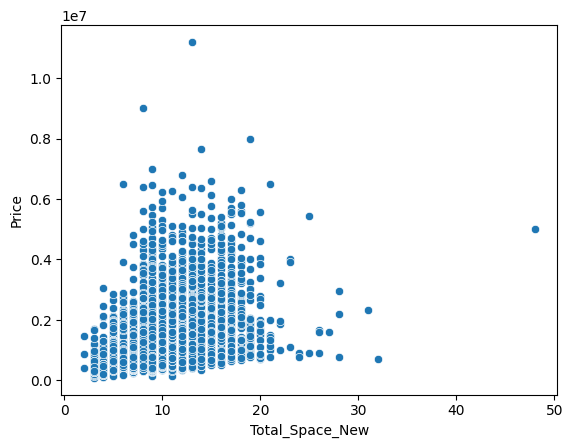

In [48]:
sns.scatterplot(data=data, x = 'Total_Space_New', y = 'Price')
plt.show()

In [50]:
# Landsize is heavily skewed data, hence fill it wil median
data['Landsize'] = data['Landsize'].fillna(value = data.groupby(['Regionname', 'Type'])['Landsize'].transform('median'))

In [51]:
# select the instances where missing value is greater than 0
pd.DataFrame({'Count': data.isnull().sum()[data.isnull().sum()>0], 'Percentage':(data.isnull().sum()[data.isnull().sum()>0] / data.shape[0])*100})

,Count,Percentage
BuildingArea,16573,61.150
YearBuilt,15117,55.778


In [ ]:
# not a good option as nearly 50% data goes missing
new_data = data.loc[data['BuildingArea'].notnull()]
new_data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total_Space_New
0,Airport West,3,t,Nelson,2016-09-03,13.500,3042.000,3,2,1,303.000,225.000,2016.000,Western Metropolitan,3464,840000,9
1,Albert Park,2,h,hockingstuart,2016-09-03,3.300,3206.000,2,1,0,120.000,82.000,1900.000,Southern Metropolitan,3280,1275000,5
3,Alphington,4,h,Brace,2016-09-03,6.400,3078.000,3,2,4,853.000,263.000,1930.000,Northern Metropolitan,2211,2000000,13
5,Altona,3,h,Greg,2016-09-03,13.800,3018.000,3,2,1,352.000,242.000,2015.000,Western Metropolitan,5301,520000,9
6,Altona North,5,h,FN,2016-09-03,11.100,3025.000,5,3,6,592.000,251.000,1965.000,Western Metropolitan,5132,1085000,19


In [55]:
# select the instances where missing value is greater than 0
pd.DataFrame({'Count': new_data.isnull().sum()[new_data.isnull().sum()>0], 'Percentage':(new_data.isnull().sum()[new_data.isnull().sum()>0] / new_data.shape[0])*100})

,Count,Percentage
YearBuilt,379,3.600


In [58]:
# Maybe a better choice in this case. Dropping columns.
data = data.drop(['BuildingArea', 'YearBuilt'], axis=1)

In [59]:
data.to_csv('data/Melbourne_Housing_NoMissing.csv', index=False)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27102 entries, 0 to 27101
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Suburb           27102 non-null  object        
 1   Rooms            27102 non-null  int64         
 2   Type             27102 non-null  object        
 3   SellerG          27102 non-null  object        
 4   Date             27102 non-null  datetime64[ns]
 5   Distance         27102 non-null  float64       
 6   Postcode         27102 non-null  float64       
 7   Bedroom          27102 non-null  int64         
 8   Bathroom         27102 non-null  int64         
 9   Car              27102 non-null  int64         
 10  Landsize         27102 non-null  float64       
 11  Regionname       27102 non-null  object        
 12  Propertycount    27102 non-null  int64         
 13  Price            27102 non-null  int64         
 14  Total_Space_New  27102 non-null  int64

## Outlier detection and treatment
* Outlier detection involves identifying data points that deviate significantly from the rest of the dataset.
* Treatment inlcudes either removing outliers if they are anomalies or transforming them to mitigate their influence on analysis, ensuring data integrity and robust analysis outcomes.

In [61]:
# Let's visualize all the outliers present in data together
data = pd.read_csv('data/Melbourne_Housing_NoMissing.csv')
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,Regionname,Propertycount,Price,Total_Space_New
0,Airport West,3,t,Nelson,2016-09-03,13.500,3042.000,3,2,1,303.000,Western Metropolitan,3464,840000,9
1,Albert Park,2,h,hockingstuart,2016-09-03,3.300,3206.000,2,1,0,120.000,Southern Metropolitan,3280,1275000,5
2,Albert Park,2,h,Thomson,2016-09-03,3.300,3206.000,2,1,0,159.000,Southern Metropolitan,3280,1455000,5
3,Alphington,4,h,Brace,2016-09-03,6.400,3078.000,3,2,4,853.000,Northern Metropolitan,2211,2000000,13
4,Alphington,3,h,Jellis,2016-09-03,6.400,3078.000,3,2,2,208.000,Northern Metropolitan,2211,1110000,10


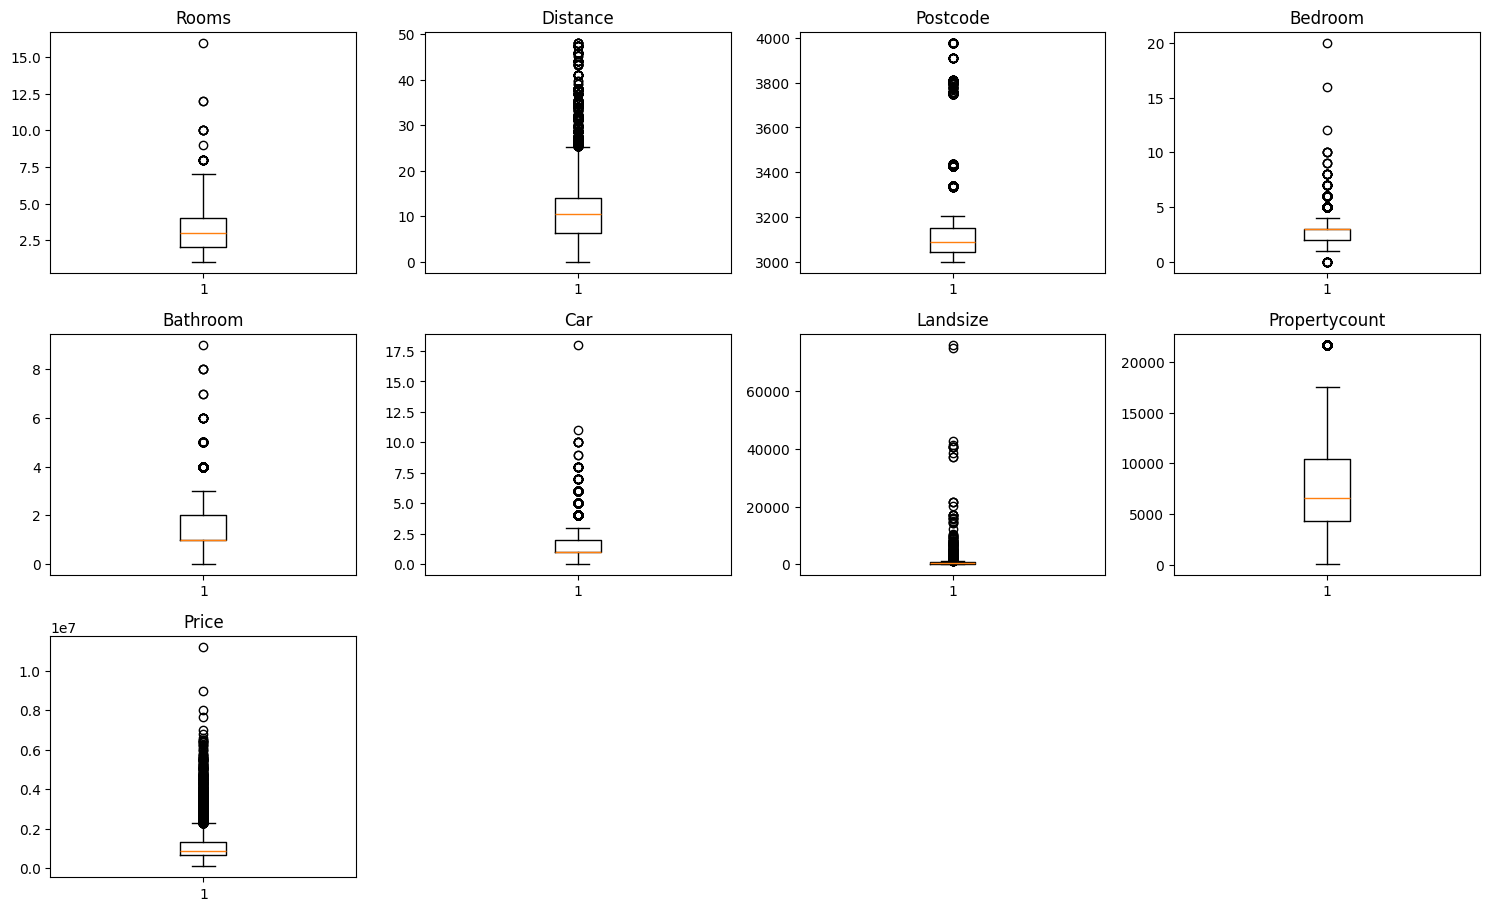

In [63]:
# outlier detection using boxplot
# selecting the numerical columns of data and adding their names in a list
numeric_columns = ['Rooms', 'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car', 'Landsize', 'Propertycount', 'Price']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i+1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()   

In [66]:
# Let's find the percentage of outliers, in each column of the data, using IQR

# to find the 25th percentile and 75th percentile for the numerical columns.
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)

# IQR, Inter Quantile Range (75th percentile - 25th percentile)
IQR = Q3 - Q1

# Finding lower and upper bounds for all values. All values outside these bounds are outliers.
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

print(lower_whisker)
print(upper_whisker)

Rooms                -1.000
Distance             -5.000
Postcode           2885.500
Bedroom               0.500
Bathroom             -0.500
Car                  -0.500
Landsize           -469.500
Propertycount     -4883.000
Price           -362500.000
dtype: float64
Rooms                 7.000
Distance             25.400
Postcode           3313.500
Bedroom               4.500
Bathroom              3.500
Car                   3.500
Landsize           1286.500
Propertycount     19589.000
Price           2297500.000
dtype: float64


In [68]:
# Percentage of outliers in each column
((data[numeric_columns] < lower_whisker) | (data[numeric_columns] > upper_whisker)).sum() / data.shape[0] * 100

Rooms           0.085
Distance        4.343
Postcode        2.911
Bedroom         4.195
Bathroom        0.871
Car             4.306
Landsize        1.742
Propertycount   2.671
Price           4.660
dtype: float64

In [69]:
# creating a function to floor and cap/clip outliers in a column

def treat_outliers(df, col):
    """
        treats outliers in a variable
        col: str, name of the numerical variable
        df: dataframe
    """ 
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

    return df

In [70]:
data = treat_outliers(data, 'Rooms')
data

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,Regionname,Propertycount,Price,Total_Space_New
0,Airport West,3,t,Nelson,2016-09-03,13.500,3042.000,3,2,1,303.000,Western Metropolitan,3464,840000,9
1,Albert Park,2,h,hockingstuart,2016-09-03,3.300,3206.000,2,1,0,120.000,Southern Metropolitan,3280,1275000,5
2,Albert Park,2,h,Thomson,2016-09-03,3.300,3206.000,2,1,0,159.000,Southern Metropolitan,3280,1455000,5
3,Alphington,4,h,Brace,2016-09-03,6.400,3078.000,3,2,4,853.000,Northern Metropolitan,2211,2000000,13
4,Alphington,3,h,Jellis,2016-09-03,6.400,3078.000,3,2,2,208.000,Northern Metropolitan,2211,1110000,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27097,Noble Park,3,h,C21,2017-09-30,22.700,3174.000,3,1,6,569.000,South-Eastern Metropolitan,11806,627500,13
27098,Reservoir,3,u,RW,2017-09-30,12.000,3073.000,3,1,1,50.000,Northern Metropolitan,21650,475000,8
27099,Roxburgh Park,4,h,Raine,2017-09-30,20.600,3064.000,4,2,2,482.000,Northern Metropolitan,5833,591000,12
27100,Springvale South,3,h,Harcourts,2017-09-30,22.200,3172.000,3,2,1,544.000,South-Eastern Metropolitan,4054,780500,9


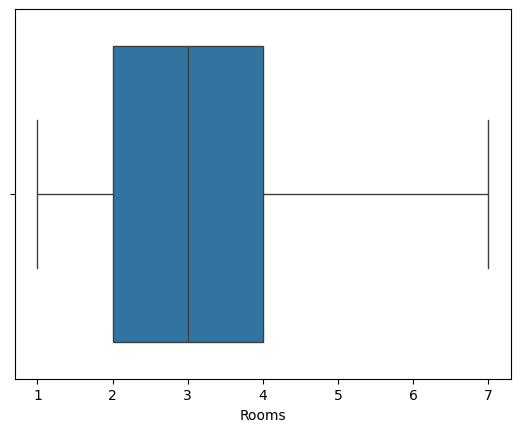

In [71]:
# visualize the column after outlier treatment
sns.boxplot(data = data, x = 'Rooms')
plt.show()

In [72]:
data = treat_outliers(data, 'Bedroom')
data = treat_outliers(data, 'Car')
data = treat_outliers(data, 'Bathroom')
data = treat_outliers(data, 'Landsize')

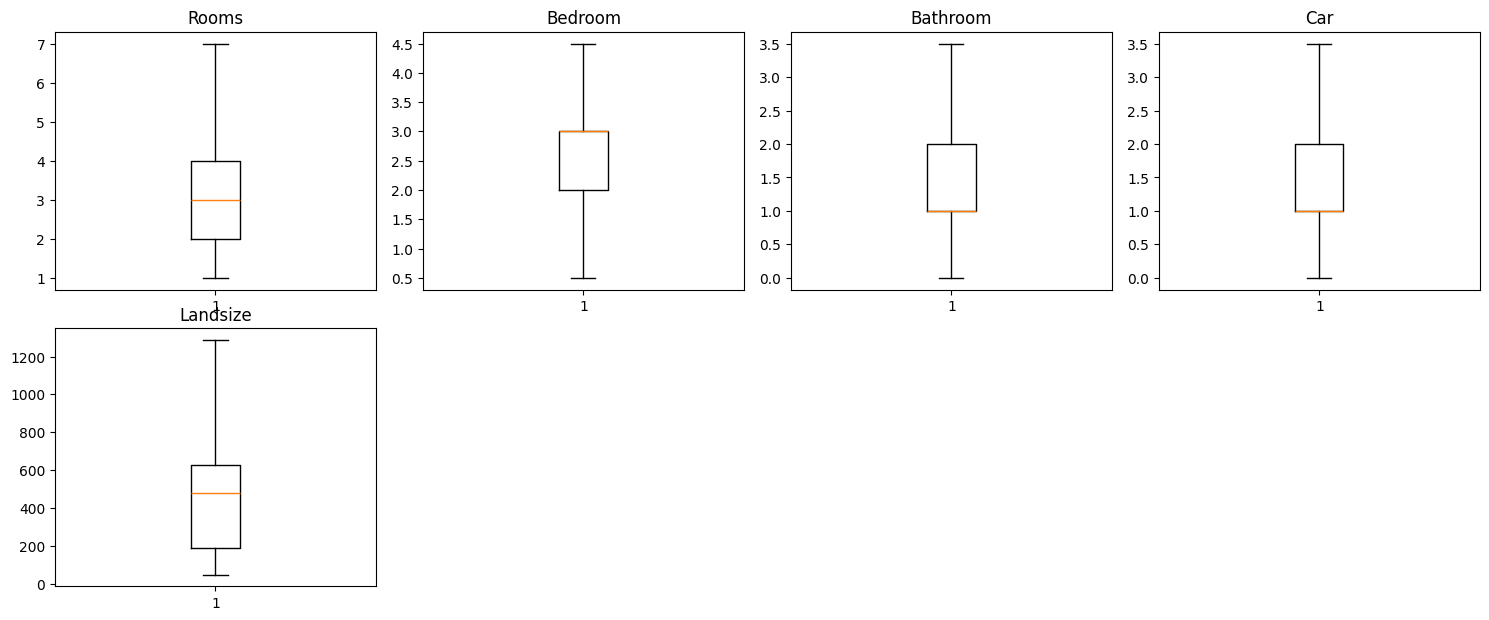

In [74]:
# outlier detection using boxplot
# selecting the numerical columns of data and adding their names in a list
numeric_columns = ['Rooms', 'Bedroom', 'Bathroom', 'Car', 'Landsize',]
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i+1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()  

In [75]:
data['Bedroom'] = data['Bedroom'].astype(int)
data['Bathroom'] = data['Bathroom'].astype(int)
data['Car'] = data['Car'].astype(int)

In [76]:
data.to_csv('data/Melbourne_Housing_NoOutliers.csv', index=False)